In [1]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel
import LogisticRegression

import time


ds3_training_set_path = 'data/ds3_train.csv'
ds3_valid_set_path = 'data/ds3_valid.csv'

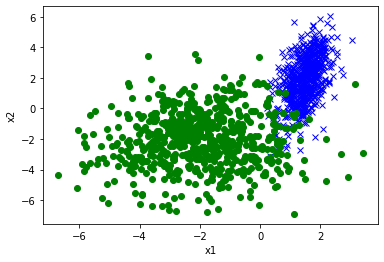

In [2]:
x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[t_train == 1, -2], x_train[t_train == 1, -1], 'bx', linewidth=2);
plt.plot(x_train[t_train == 0, -2], x_train[t_train == 0, -1], 'go', linewidth=2);

In [3]:
log_reg = LogisticRegression.LogisticRegression()

start = time.time()
log_reg.fit(x_train, t_train)
end = time.time()

time_log_reg = end - start

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on training set is:  0.9632


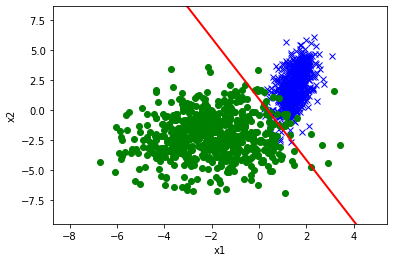

In [4]:
util.plot(x_train, t_train, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(t_train == log_reg.predict(x_train)))

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on test set is:  0.9838709677419355


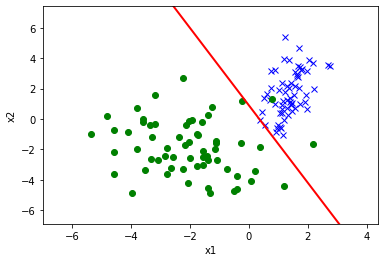

In [5]:
util.plot(x_test, t_test, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on test set is: ", np.mean(t_test == log_reg.predict(x_test)))

In [6]:
log_regy = LogisticRegression.LogisticRegression()

start = time.time()
log_regy.fit(x_train, y_train)
end = time.time()

time_log_reg = end - start

Theta is:  [-2.91607454  0.78596651  0.09282768]
The accuracy on training set is:  0.9


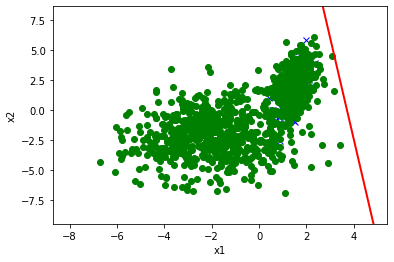

In [15]:
util.plot(x_train, y_train, log_regy.theta)
print("Theta is: ", log_regy.theta)
print("The accuracy on training set is: ", np.mean(y_train == log_regy.predict(x_train)))

Theta is:  [-2.91607454  0.78596651  0.09282768]
The accuracy on test set is:  0.8870967741935484


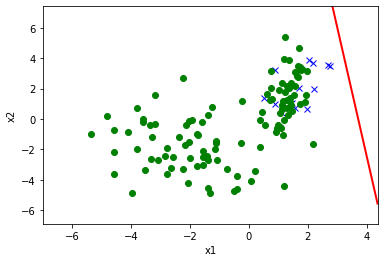

In [16]:
util.plot(x_test, y_test, log_regy.theta)
print("Theta is: ", log_regy.theta)
print("The accuracy on test set is: ", np.mean(y_test == log_regy.predict(x_test)))

In [27]:
def h(theta, x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [28]:
Vplus = x_valid[y_valid == 1]
alpha = h(log_regy.theta, Vplus).mean()

In [29]:
def predict(theta, x):
    return h(theta, x) / alpha >= 0.5

In [30]:
theta_prime = log_regy.theta + np.log(2 / alpha - 1) * np.array([1, 0, 0])

Theta_prime is:  [-0.55096984  0.78596651  0.09282768]
The accuracy on test set is:  0.967741935483871


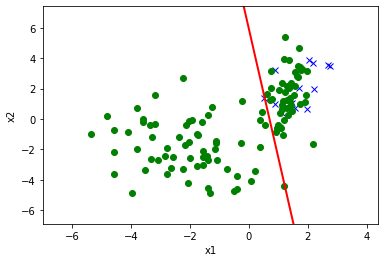

In [31]:
util.plot(x_test, y_test, theta_prime)
print("Theta_prime is: ", theta_prime)
print("The accuracy on test set is: ", np.mean(predict(log_reg.theta, x_test) == t_test))